##### Here is a link to my source code
https://github.com/CeceZiegler1/CeceZiegler1.github.io/blob/main/posts/gradient_blog/LogisticRegression.py

In [1]:
%load_ext autoreload
%autoreload 2

# Gradient Decent Implementation
Below, I show an example of my implementation of logistic regression using gradient decent. I make data and create a plot to show where my line separated the data. I then print out the loss and the accuracy to show how well the model performed. On average, my model averaged a loss between 0.15-0.19 which makes sense as the data is not linearly seperable, which makes this a reasonable loss.

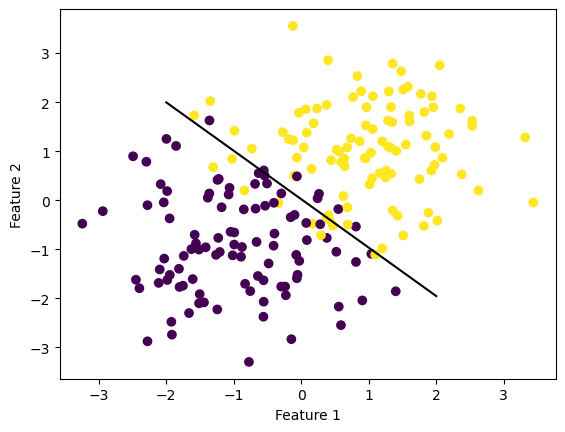

In [300]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import numpy as np
np.seterr(all='ignore') 

from LogisticRegression import LogisticRegression

def draw_line(w, x_min, x_max):
  x = np.linspace(x_min, x_max, 101)
  y = -(w[0]*x + w[2])/w[1]
  plt.plot(x, y, color = "black")

# make the data
p_features = 3
X, y = make_blobs(n_samples = 200, n_features = p_features - 1, centers = [(-1, -1), (1, 1)])


LR = LogisticRegression()
LR.fit(X, y, alpha = 0.1, max_epochs = 1000)

fig = plt.scatter(X[:,0], X[:,1], c = y)
fig = draw_line(LR.w, -2, 2)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

### Printing out Gradient Decent Loss

In [341]:
#Loss
print(LR.loss)

0.2608236468870702


(3,)

# Stochastic Gradient Implementation
Below is an example of a test of my stochastic gradient implementation. The stochastic gradient is similar to regular gradient decent, however it uses batch sizes to partiton the data and computes the gradient of the batch instead of the whole gradient at once. As we can see from the example below, depending on factors such as the size of the batch, stochastic gradient can help us minimize the loss. After running the regular gradient decent and the stochastic gradient decent many times each, the stochastic gradient decent averages a loss of about .13-.16 which is slightly lower than the loss of regular graident decent. Along with having on average a slightly better loss, the stochastic gradient method converges to a minimum faster than regular gradient decent

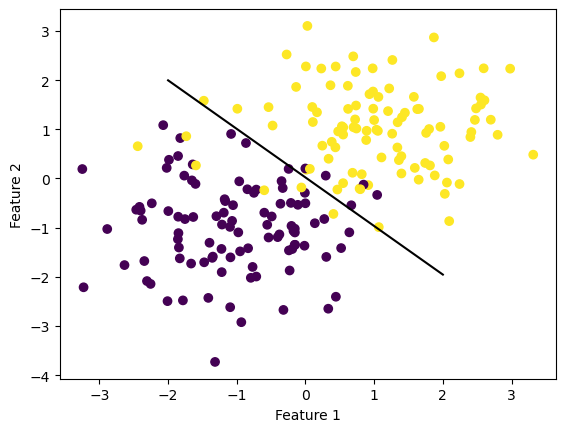

In [307]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import numpy as np
np.seterr(all='ignore') 

from LogisticRegression import LogisticRegression

def draw_line(w, x_min, x_max):
  x = np.linspace(x_min, x_max, 101)
  y = -(w[0]*x + w[2])/w[1]
  plt.plot(x, y, color = "black")

# make the data
p_features = 3
X, y = make_blobs(n_samples = 200, n_features = p_features - 1, centers = [(-1, -1), (1, 1)])


LRS = LogisticRegression()
LRS.fit_stochastic(X, y, alpha = 0.1, max_epochs = 1000, momentum = False, batch_size = 10)

fig = plt.scatter(X[:,0], X[:,1], c = y)
fig = draw_line(LR.w, -2, 2)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

In [327]:
print(LRS.loss)

0.1364397783931314


# Momentum with Stochastic Gradient
Below is an example of a test using my stochastic gradient implementation including momentum. The model is the exact same as the stochastic gradient model, however one parameter is changed. When calling the fit method for regular stochastic gradient, I set the momentum parameter = to false. This indicated to set the coeficent beta to 0, meaning momentum won't be added in when the weight vector is updated. However, when the momentum parameter is true, this indicates to include momentum, thus setting the beta coefficient to 0.8. Adding in momentum accelerates the process in which we are making our way down the gradient toward the minimum, thus helping to converge to the minimum faster. In this example, we also print out the loss which in this specific example was a solid loss at only 0.13, but the loss tends to remain in the same range as regular stochastic gradient

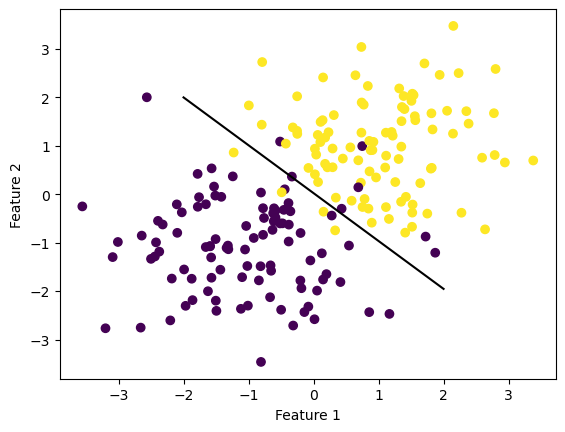

In [324]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import numpy as np
np.seterr(all='ignore') 

from LogisticRegression import LogisticRegression

def draw_line(w, x_min, x_max):
  x = np.linspace(x_min, x_max, 101)
  y = -(w[0]*x + w[2])/w[1]
  plt.plot(x, y, color = "black")

# make the data
p_features = 3
X, y = make_blobs(n_samples = 200, n_features = p_features - 1, centers = [(-1, -1), (1, 1)])


LRS = LogisticRegression()
LRS.fit_stochastic(X, y, alpha = 0.1, max_epochs = 1000, momentum = True, batch_size = 10)

fig = plt.scatter(X[:,0], X[:,1], c = y)
fig = draw_line(LR.w, -2, 2)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

In [326]:
print(LRS.loss)

0.1364397783931314


# Loss History Over Time
Below is a graph of each of the three models described above showing their loss history over each epoch/iteration. As we can see from the graph, regular gradient decent takes much longer to converge than stochastic gradient and stochastic gradient with momentum. Both the stochastic with momentum took 100 iteration, and stochastic without momentum took 200 iterations to converge whereas the regular gradient decent took 2100 iterations. This is a very significant difference in time and displays how stochastic gradient implementations can converge faster. We are also able to see from this how momentum helps speed up the time of convergence, as the model that included momentum took 100 less iteration to converge. 

100
200
2100


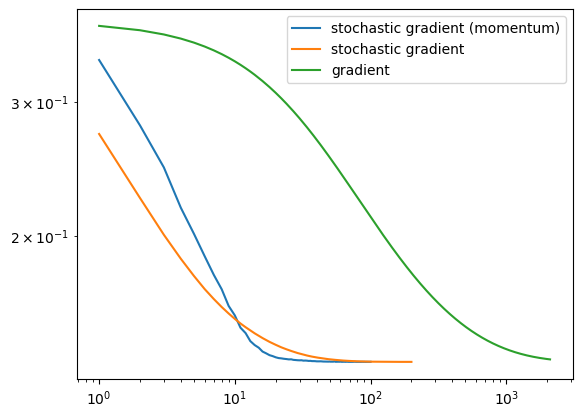

In [329]:
LR = LogisticRegression()
LR.fit_stochastic(X, y, 
                  max_epochs = 100, 
                  momentum = True, 
                  batch_size = 10, 
                  alpha = .05) 
print(len(LR.loss_history))

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "stochastic gradient (momentum)")

LR = LogisticRegression()
LR.fit_stochastic(X, y, 
                  max_epochs = 100, 
                  momentum = False, 
                  batch_size = 10, 
                  alpha = .1)
print(len(LR.loss_history))

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "stochastic gradient")

LR = LogisticRegression()
LR.fit(X, y, alpha = .05, max_epochs = 100)
print(len(LR.loss_history))

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "gradient")

plt.loglog()

legend = plt.legend() 

# Alpha too big to Converge
Below is an example in which the size of the alpha is too large which causes the model to be unable to converge to the minimum. In this test example, I set the alpha to 35 and the max_epochs to 100. Although the model still completed running, it's loss was 0.26 which is much higher than we want and higher than any of the above model examples. This shows that the alpha size was too large, and the model was unable to converge to the proper minimum. 

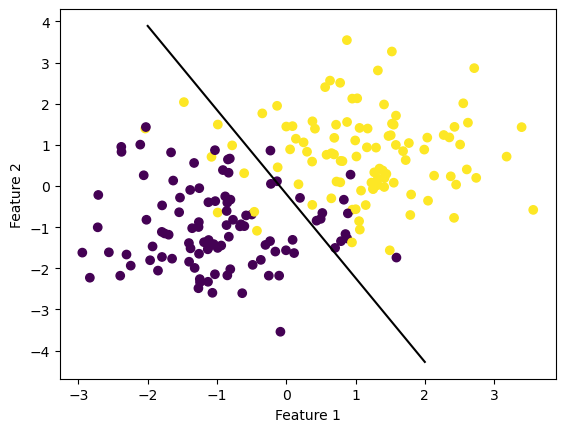

In [338]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import numpy as np
np.seterr(all='ignore') 

from LogisticRegression import LogisticRegression

def draw_line(w, x_min, x_max):
  x = np.linspace(x_min, x_max, 101)
  y = -(w[0]*x + w[2])/w[1]
  plt.plot(x, y, color = "black")

# make the data
p_features = 3
X, y = make_blobs(n_samples = 200, n_features = p_features - 1, centers = [(-1, -1), (1, 1)])


LR = LogisticRegression()
LR.fit(X, y, alpha = 30, max_epochs = 100)

fig = plt.scatter(X[:,0], X[:,1], c = y)
fig = draw_line(LR.w, -2, 2)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")


In [339]:
LR.loss

0.2608236468870702

100
300


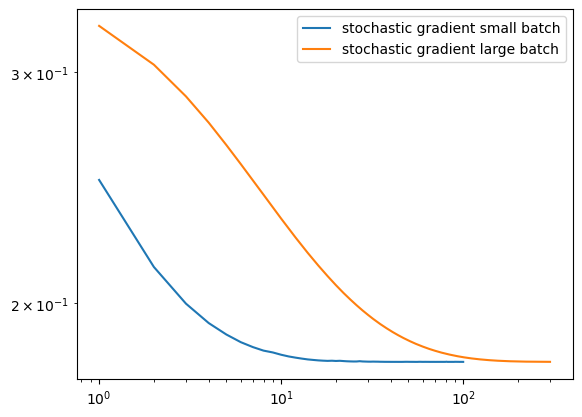

In [258]:
LR = LogisticRegression()
LR.fit_stochastic(X, y, 
                  max_epochs = 100, 
                  momentum = False, 
                  batch_size = 2, 
                  alpha = .05) 
print(len(LR.loss_history))

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "stochastic gradient small batch")

LR = LogisticRegression()
LR.fit_stochastic(X, y, 
                  max_epochs = 100, 
                  momentum = False, 
                  batch_size = 20, 
                  alpha = .05) 
print(len(LR.loss_history))

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "stochastic gradient large batch")

plt.loglog()

legend = plt.legend()

#This shows that small batch size takes longer to converge, 100 iterations for large batch compared to 600 for small batch

# Example showing batch size influencing convergence speed. 
In the graph above, we can see how batch size affects the speed of convergence. Here, we show the convergence of two regular stochastic gradients, one with a batch size of 2, and the other with a batch size of 20. The function with a batch size of 20 took 100 iterations to converge, whereas the function with a batch size of 2 took 300 iterations to converge. This is three times the amount of iterations which shows that having a small batch size takes a longer time to converge. 

500
1000


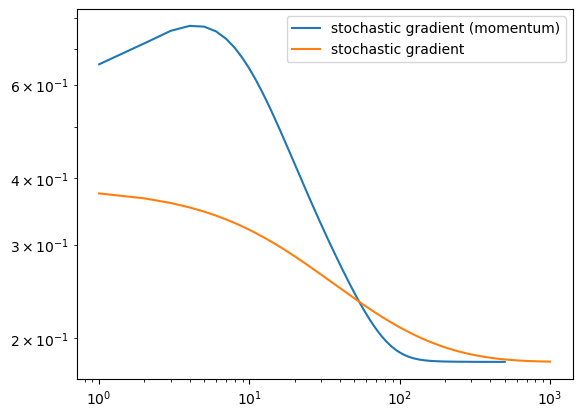

In [255]:
LR = LogisticRegression()
LR.fit_stochastic(X, y, 
                  max_epochs = 500, 
                  momentum = True, 
                  batch_size = 250, 
                  alpha = 0.1) 
print(len(LR.loss_history))

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "stochastic gradient (momentum)")

LR = LogisticRegression()
LR.fit_stochastic(X, y, 
                  max_epochs = 500, 
                  momentum = False, 
                  batch_size = 250, 
                  alpha = 0.1)
print(len(LR.loss_history))

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "stochastic gradient")

plt.loglog()

legend = plt.legend()
#Momentum converges faster when the batch size is large

# Example: Momentum Converging Faster than Regular Stochastic:
The graph above shows an example of when momentum significantly speeds up convergence. In this example, we have a large batch size. With the large batch size, the stochastic momentum gradient only takes 500 iterations to converge, whereas the regular stochastic gradient takes 1000 iterations to converge. This is double the amount of iterations, showing that when the batch size is large, momentum helps the stochastic gradeient converge faster.